# PART 1

## PART 1(A)

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Set parameters
N = 10000
s = 1

In [3]:
# Initialise variables
samples = []
x_prev = 0  # Initial value x[0]

In [4]:
# Metropolis-Hastings algorithm
for i in range(N):
    # Generate proposal
    x_star = np.random.normal(loc=x_prev, scale=s)
    
    # Compute acceptance probability
    ratio = np.exp(0.5 * (-np.abs(x_star) + np.abs(x_prev)))
    
    # Accept or reject proposal
    u = np.random.uniform()
    if np.log(u) < np.log(ratio):
        x_prev = x_star
    
    # Add sample to list
    samples.append(x_prev)

In [5]:
# Compute sample mean and standard deviation
sample_mean = np.mean(samples)
sample_std = np.std(samples)

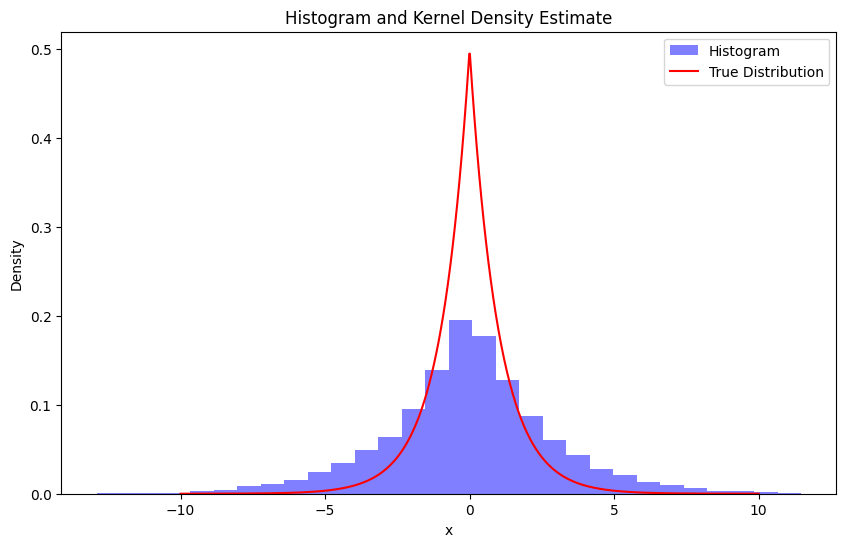

In [6]:
# Plot histogram and kernel density estimate
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.5, color='blue', label='Histogram')
plt.plot(np.linspace(-10, 10, 1000), 0.5 * np.exp(-np.abs(np.linspace(-10, 10, 1000))), color='red', label='True Distribution')
plt.title('Histogram and Kernel Density Estimate')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

In [7]:
# Monte Carlo estimate of sample mean
print("Sample Mean:", sample_mean)

Sample Mean: -0.055743821099239525


In [8]:
# Monte Carlo estimate of standard deviation
print("Sample Standard Deviation:", sample_std)

Sample Standard Deviation: 2.9351949350812006


## PART 1(B)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Function to calculate R-hat diagnostic
def calculate_r_hat(x_chains):
    J = len(x_chains)
    M = np.array([np.mean(chain) for chain in x_chains])
    V = np.array([np.mean((chain - np.mean(chain))**2) for chain in x_chains])
    W = np.mean(V)
    M_bar = np.mean(M)
    B = np.mean((M - M_bar)**2)
    R_hat = np.sqrt((B + W) / W)
    return R_hat

In [18]:
# Function to generate chains of x values
def generate_x_chains(N, s, J):
    x_chains = []
    for j in range(J):
        x_chain = np.zeros(N)
        x_chain[0] = np.random.normal()
        for i in range(1, N):
            x_star = np.random.normal(loc=x_chain[i-1], scale=s)
            r = f(x_star) / f(x_chain[i-1])
            u = np.random.uniform()
            if np.log(u) < np.log(r):
                x_chain[i] = x_star
            else:
                x_chain[i] = x_chain[i-1]
        x_chains.append(x_chain)
    return x_chains

In [19]:
# Define probability density function f(x)
def f(x):
    return 0.5 * np.exp(-np.abs(x))

In [20]:
# Parameters
N = 2000
J = 4
s_values = np.arange(0.001, 1.001, 0.01)

In [21]:
# Calculate R-hat for different s values
r_hat_values = np.zeros(len(s_values))
for i, s in enumerate(s_values):
    x_chains = generate_x_chains(N, s, J)
    r_hat_values[i] = calculate_r_hat(x_chains)

In [24]:
print(r_hat_values[i])

1.0036188194957663


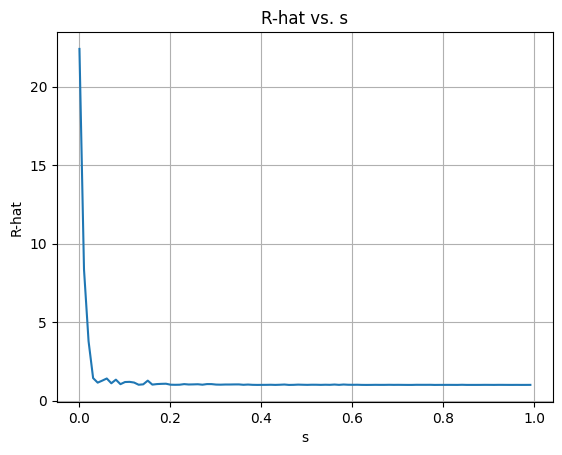

In [22]:
# Plot R-hat values over s values
plt.plot(s_values, r_hat_values)
plt.xlabel('s')
plt.ylabel('R-hat')
plt.title('R-hat vs. s')
plt.grid(True)
plt.show()